In [35]:
import time
import speech_recognition as sr
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [36]:
#prepare
r = sr.Recognizer()
model = keras.models.load_model('D:/Schmiede/Coding/IIS_Seminar/emotion-detection-and-reaction/SER/best_SER_model.h5')


Say something!


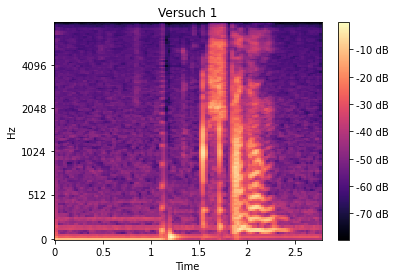

ValueError: in user code:

    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\User\.conda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 1]


In [40]:
for i in range(5):
    with sr.Microphone() as source:
        print("Say something!")
        audio = r.listen(source)
    with open("microphone-results.wav", "wb") as f:
        f.write(audio.get_wav_data())
    
    #X, sample_rate = lb.load('D:/Schmiede/Coding/IIS_Seminar/emotion-detection-and-reaction/SER/microphone-results.wav')
    #plt.figure(figsize=(8, 4))
    #lb.display.waveshow(x, sr=samplingrate)
    #plt.title('Waveplot - Male Neutral')
    #plt.show()
    
    X, sample_rate = lb.load('D:/Schmiede/Coding/IIS_Seminar/emotion-detection-and-reaction/SER/microphone-results.wav')
    spectrogram = lb.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    spectrogram = lb.power_to_db(spectrogram)
    librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
    plt.title('Versuch '+ str(i+1))
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    

    db_spec = lb.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    X_test = np.array(log_spectrogram)
    
    predictions = model.predict(X_test)
    print(predictions)